<a href="https://nbviewer.jupyter.org/github/phelantomas/StackSurvey/blob/master/Notebooks/Home_Page.ipynb">Back Home</a>

<img src="https://i.imgur.com/36sp6u2.png" align="middle">

<img src="https://cdn.sstatic.net/Sites/stackoverflow/company/img/logos/so/so-logo.png" style="width:400px;height:80px;" align="middle">
<h1><font color="orange">Stackoverflow Survey 2017 Data Analysis</font></h1>

Goal 2:

The second goal is to analyse the developer’s expected salary, and actual salaries, when both are provided, by country, to examine the expectation versus actuality of developer pay.

From this an analysis can then be conducted into the influence of education and experience in programming on a developer’s perceived self-worth and their subsequent overall pay, and relate these with the comparative cost of living per country.

The information provided here may be used as a deciding factor for future developers as to the value of education versus experience and the projected range of earnings a programmer may expect in the future.

It may also influence a programmer’s desire to migrate when comparing salary versus cost of living per country.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import plotly.plotly as py
from plotly import tools
from plotly.offline import iplot, init_notebook_mode
import pycountry
from sklearn.metrics import mean_squared_error, r2_score
import operator
%matplotlib inline 

dataSurvey = pd.read_csv('C:/Users/Thomas/Desktop/StackOverFlow/survey_results_public.csv')

<h1>The Importance of Education</h1>

Education is an incredibly long and expensive process. In this notebook, we are going to take a look at a number of different scenarios, from what people think, to facts.

<h2>Cleaning Up Data</h2>

Firstly lets first take a look at the number of unique answers to the importance of education.

In [2]:
dataSurvey['EducationImportant'].unique()

array([nan, 'Not very important', 'Important', 'Somewhat important',
       'Not at all important', 'Very important'], dtype=object)

From this we can see the answers are nan, 'Not very important', 'Important', 'Somewhat important',
       'Not at all important', 'Very important'.
       
Lets order these by importance, to make it quicker to understand the results.

In [3]:
orderOfImport = ["Not at all important", "Not very important", "Somewhat important", "Important", "Very important"]
dataSurvey['EducationImportant'] = pd.Categorical(dataSurvey['EducationImportant'], categories=orderOfImport, ordered=True)

In [4]:
dataSurvey['EducationImportant'].unique()

[NaN, Not very important, Important, Somewhat important, Not at all important, Very important]
Categories (5, object): [Not at all important < Not very important < Somewhat important < Important < Very important]

As you can now see, the data is now in order of opinion, this will make charting it later easier.

Before we do any charting though, the data should be cleaned of any null values and made up results. Removing Salaries that are not provided, along with Education, as well as salaries below a certain threshold to clean up the data.

In [5]:
dataSurvey = dataSurvey[dataSurvey['Salary'].notnull()]
dataSurvey = dataSurvey.query('Salary>21')
dataSurvey = dataSurvey[dataSurvey['FormalEducation'] != 'I prefer not to answer']

<h2> The Percieved Importance of Education</h2>

Now that the data has been pre processed, it is now time to start analysing it.

<h3>How the World Feels</h3>

Firstly, how the entire world feels about education.

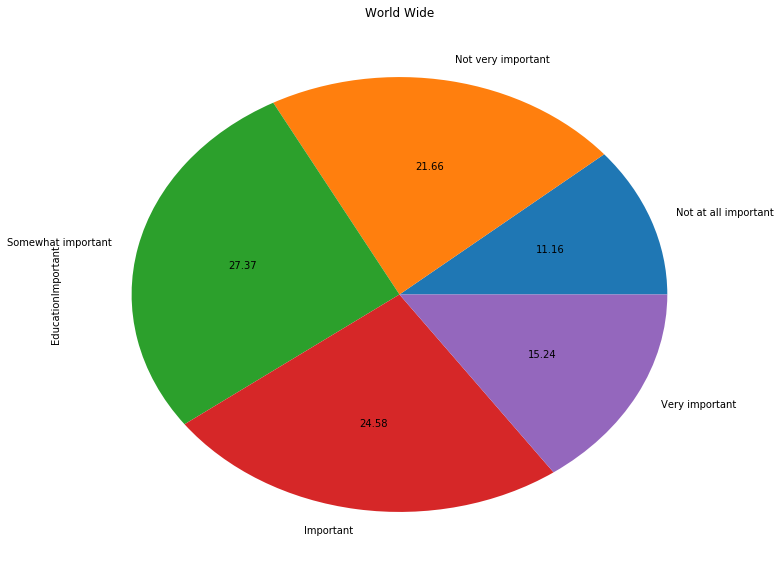

In [6]:
dataSurvey['EducationImportant'].value_counts(sort=False).plot(kind='pie',figsize=(12,10), title="World Wide", autopct='%.2f')

As we can gather from this graph, we can see that the vast majority of the world, feel education is important to some degree, with only a little over a quarter, thinking it is not that important.

<h3>How Specific Countries Feel </h3>

Now lets take a more indept look, and see what specific countries feeling towards education.

<h4>Ireland</h4>

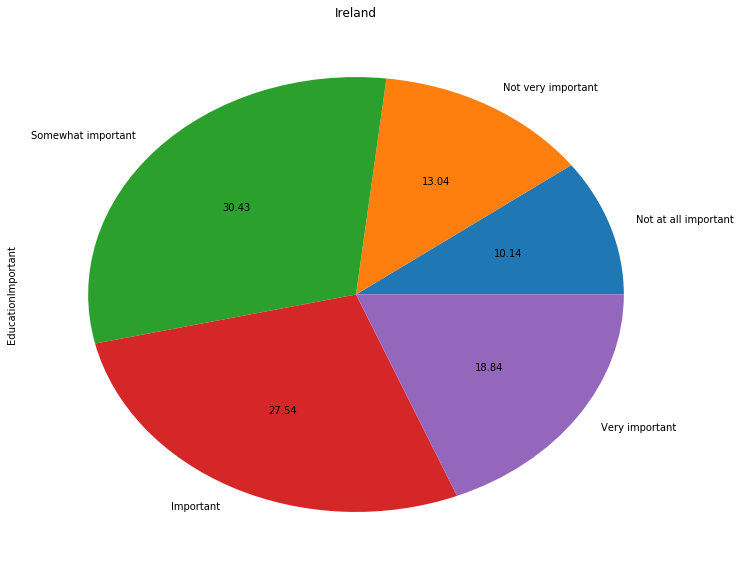

In [7]:
dataSurvey[dataSurvey['Country'] == 'Ireland']['EducationImportant'].value_counts(sort=False).plot(kind='pie',figsize=(12,10), title="Ireland", autopct='%.2f')

As shown above, Ireland places a huge importance on education, with almost a quarter saying it is very important, and almost half thinking its important.

<h4>America</h4>

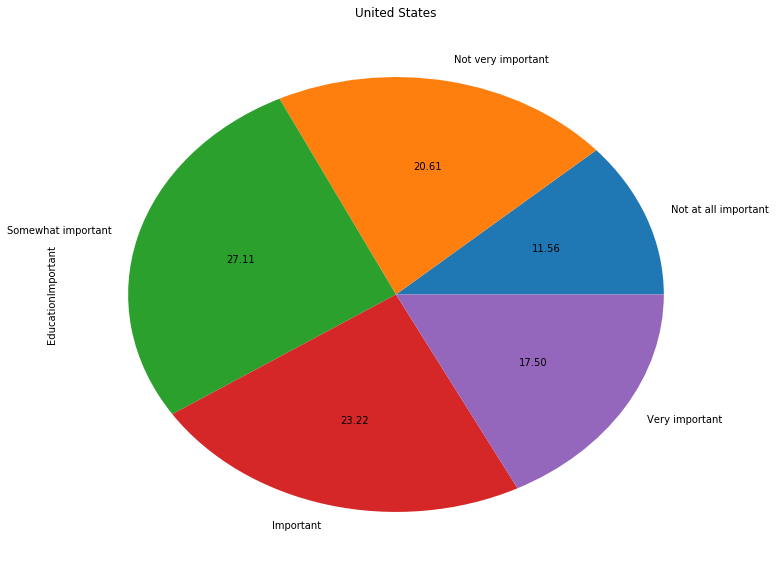

In [8]:
dataSurvey[dataSurvey['Country'] == 'United States']['EducationImportant'].value_counts(sort=False).plot(kind='pie',figsize=(12,10), title="United States", autopct='%.2f')

America also values education, though not to the same extent as Ireland, with well over a quarter of respondants believing that Education is not that important.

<h4>UK</h4>

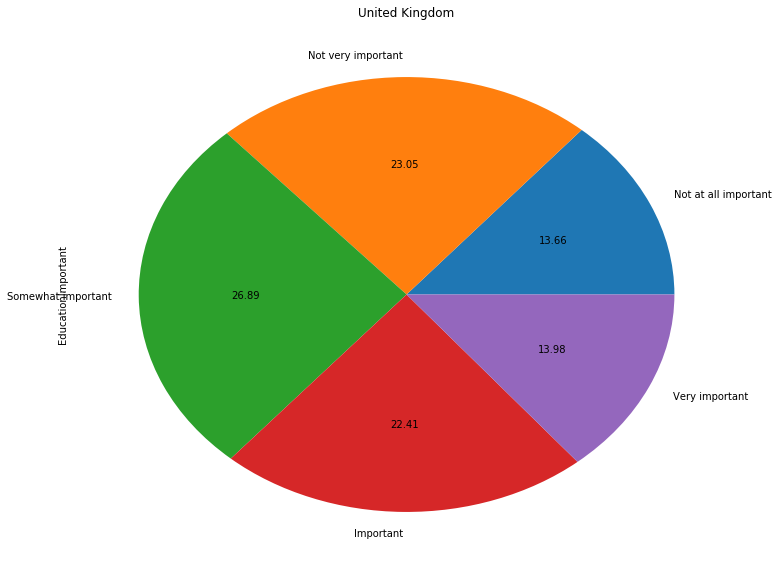

In [9]:
dataSurvey[dataSurvey['Country'] == 'United Kingdom']['EducationImportant'].value_counts(sort=False).plot(kind='pie',
                                                                                                          figsize=(12,10), title="United Kingdom", autopct='%.2f')

The UK, again mostly values education, though the least of the three.

<h2>Salary Based on Education</h2>

Now that we have seen what the general opinion regarding education, we will now look and see what effect it actually plays.

<h3>Expected Outcome</h3>

The expected outcome is for salary to increase with the higher the level of education is.

<h3>Prepare the Data</h3>

Firstly take in every country in the world, then get the average salary, based on education.

In [10]:
mapping = {country.name: country.alpha3 for country in pycountry.countries}
mappingDataList = []

In [11]:
for country in mapping:
    mappingData = {'Country': country, 
                  'Average Salary No Education' : dataSurvey.loc[(dataSurvey['Country'] == country) 
                                                 & (dataSurvey['FormalEducation'] == "I never completed any formal education"), 'Salary'].mean(),
                   'Average Salary Primary' : dataSurvey.loc[(dataSurvey['Country'] == country) 
                                                 & (dataSurvey['FormalEducation'] == "Primary/elementary school"), 'Salary'].mean(),
                   'Average Salary Secondary' : dataSurvey.loc[(dataSurvey['Country'] == country) 
                                                 & (dataSurvey['FormalEducation'] == "Secondary school"), 'Salary'].mean(),
                   'Average Salary Some college' : dataSurvey.loc[(dataSurvey['Country'] == country)
                                                 & (dataSurvey['FormalEducation'] == "Some college/university study without earning a bachelor's degree"), 'Salary'].mean(),
                   'Average Salary Bachelor' : dataSurvey.loc[(dataSurvey['Country'] == country) 
                                                 & (dataSurvey['FormalEducation'] == "Bachelor's degree"), 'Salary'].mean(),
                   'Average Salary Professional' : dataSurvey.loc[(dataSurvey['Country'] == country) 
                                                 & (dataSurvey['FormalEducation'] == "Professional degree"), 'Salary'].mean(),
                   'Average Salary Master' : dataSurvey.loc[(dataSurvey['Country'] == country) 
                                                 & (dataSurvey['FormalEducation'] == "Master's degree"), 'Salary'].mean(),
                   'Average Salary Doctoral' : dataSurvey.loc[(dataSurvey['Country'] == country) 
                                                 & (dataSurvey['FormalEducation'] == "Doctoral degree"), 'Salary'].mean(),
                  'Expected Salary' : dataSurvey.loc[dataSurvey['Country'] == country, 'ExpectedSalary'].mean(),
                  }
    mappingDataList.append(mappingData)


dfSalary = pd.DataFrame(mappingDataList, columns=['Country','Average Salary No Education', 
                                                      'Average Salary Primary', 'Average Salary Secondary',
                                                      'Average Salary Some college',
                                                     'Average Salary Bachelor', 'Average Salary Professional', 
                                                     'Average Salary Master', 'Average Salary Doctoral' ])

<h3>Salary Based on Education</h3>

Now lets take a look at some countries and their salary, based on education.

<h4>Ireland</h4>

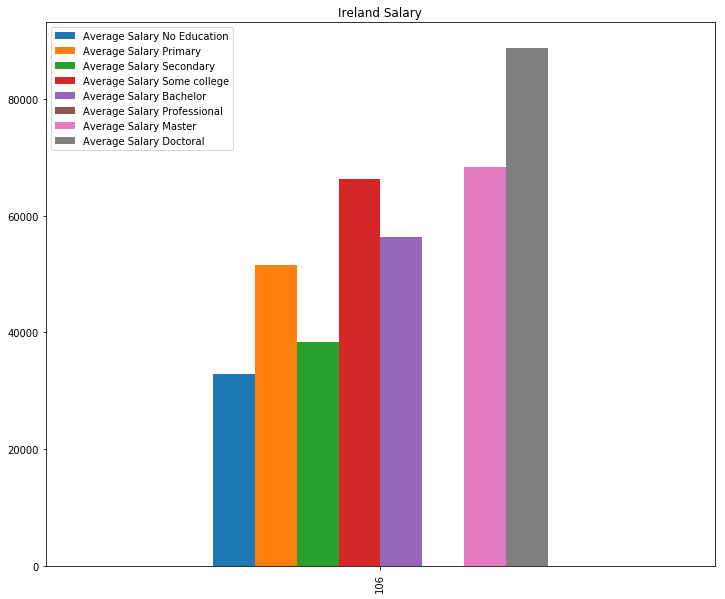

In [12]:
dfSalary[(dfSalary['Country'] == 'Ireland')].plot(kind='bar',title ="Ireland Salary",figsize=(12,10))

These results for Ireland were what we were expecting. In general, the higher the education, the greater the salary.

<h4>Germany</h4>

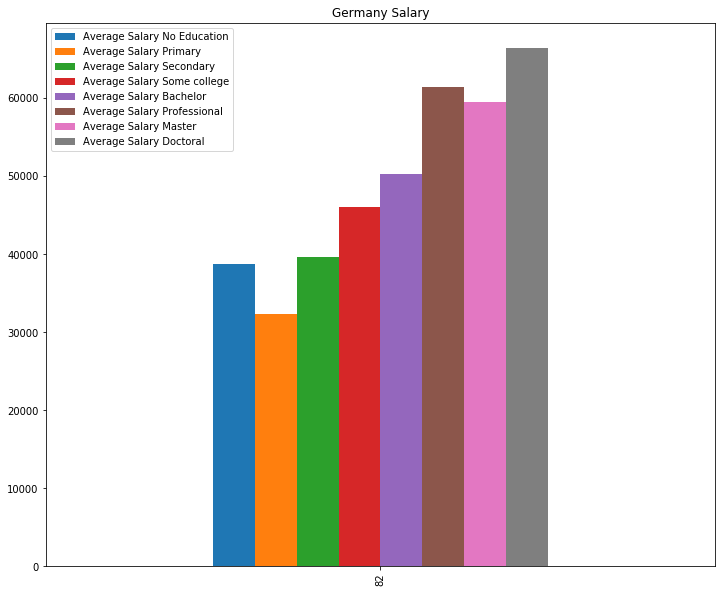

In [13]:
dfSalary[(dfSalary['Country'] == 'Germany')].plot(kind='bar',title="Germany Salary",figsize=(12,10))

Germany follows the same trend.

<h4>UK</h4>

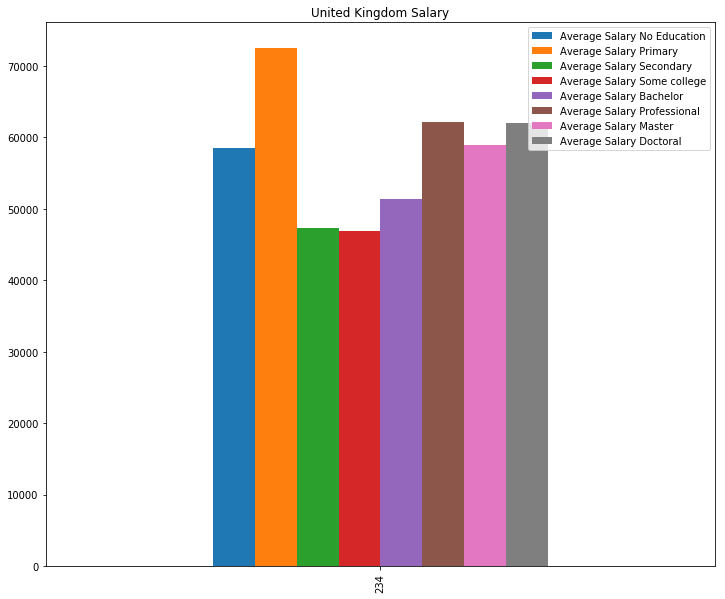

In [14]:
dfSalary[(dfSalary['Country'] == 'United Kingdom')].plot(kind='bar',title ="United Kingdom Salary",figsize=(12,10))

The Uk results are a bit odd, with people with only a primary school education with the highest salary

<h4>America</h4>

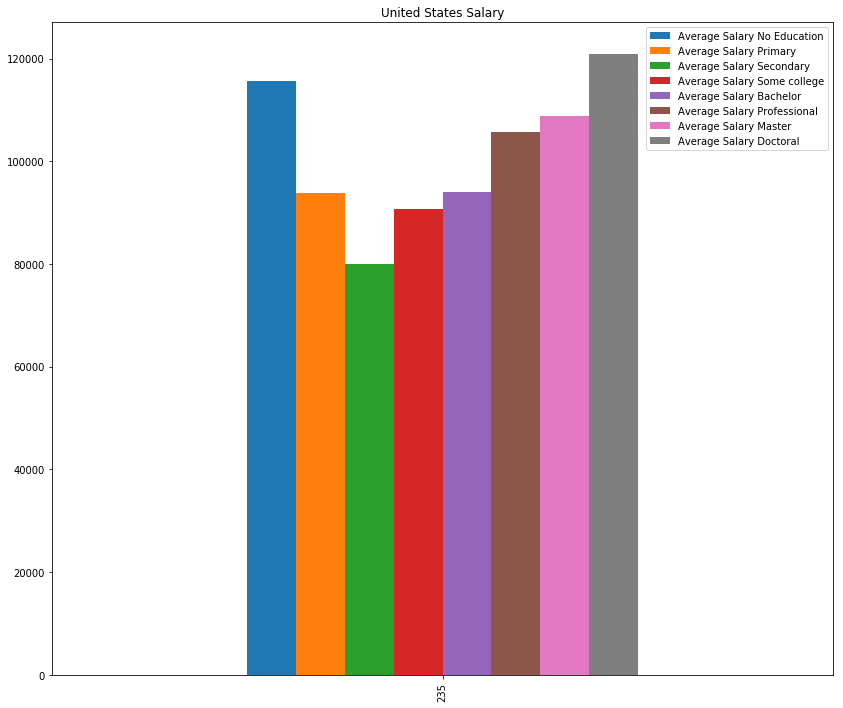

In [15]:
dfSalary[(dfSalary['Country'] == 'United States')].plot(kind='bar',title ="United States Salary",figsize=(14,12))

America again is a bit odd, with no education being the second highest with doctoral still the highest. Prehaps it is due to people putting no education down even when not true.

<h3>Conclusion</h3>

We took a look at four countries, Ireland, Germany, Uk, and the USA. The results from Ireland and Germany made sense, with the higher the education, the greater the salary, with people with docarates getting the most, and people with no education, getting the least.

The results from the UK and USA were a bit more suprising, with the UK, the highest earners only completed primary school, and the USA, with docdorates still the highest, but followed in second by no education. 

Will now look into years programming, and see if that plays a bigger factor in pay.

<h3>Salary Based on Years Programming</h3>

<h4>Expected Outcome</h4>

The expected outcome is for salary to increase with years programmed.

<h4>Data Preperation</h4>

We will get the number of different responses for years programming.

In [16]:
dataSurvey['YearsProgram'].unique()

array(['20 or more years', '2 to 3 years', '10 to 11 years',
       '7 to 8 years', '4 to 5 years', '8 to 9 years', '11 to 12 years',
       '3 to 4 years', '5 to 6 years', '9 to 10 years', '17 to 18 years',
       '14 to 15 years', '1 to 2 years', '16 to 17 years',
       '12 to 13 years', '18 to 19 years', '6 to 7 years',
       '15 to 16 years', '13 to 14 years', '19 to 20 years',
       'Less than a year', nan], dtype=object)

With this knowledge, we will create a new pandas table, using the same methodology as used above.

In [17]:
mappingDataListYears = []

for country in mapping:
    mappingData = {'Country': country, 
                  'Less than a year' : dataSurvey.loc[(dataSurvey['Country'] == country) 
                                                 & (dataSurvey['YearsProgram'] == "Less than a year"), 'Salary'].mean(),
                   '1 to 2 years' : dataSurvey.loc[(dataSurvey['Country'] == country) 
                                                 & (dataSurvey['YearsProgram'] == "1 to 2 years"), 'Salary'].mean(),
                   '2 to 3 years' : dataSurvey.loc[(dataSurvey['Country'] == country) 
                                                 & (dataSurvey['YearsProgram'] == "2 to 3 years"), 'Salary'].mean(),
                   '3 to 4 years' : dataSurvey.loc[(dataSurvey['Country'] == country) 
                                                 & (dataSurvey['YearsProgram'] == "3 to 4 years"), 'Salary'].mean(),
                   '4 to 5 years' : dataSurvey.loc[(dataSurvey['Country'] == country)
                                                 & (dataSurvey['YearsProgram'] == "4 to 5 years"), 'Salary'].mean(),
                   '5 to 6 years' : dataSurvey.loc[(dataSurvey['Country'] == country) 
                                                 & (dataSurvey['YearsProgram'] == "5 to 6 years"), 'Salary'].mean(),
                   '7 to 8 years' : dataSurvey.loc[(dataSurvey['Country'] == country) 
                                                 & (dataSurvey['YearsProgram'] == "7 to 8 years"), 'Salary'].mean(),
                   '8 to 9 years' : dataSurvey.loc[(dataSurvey['Country'] == country) 
                                                 & (dataSurvey['YearsProgram'] == "8 to 9 years"), 'Salary'].mean(),
                   '9 to 10 years' : dataSurvey.loc[(dataSurvey['Country'] == country) 
                                                 & (dataSurvey['YearsProgram'] == "9 to 10 years"), 'Salary'].mean(),
                   '10 to 11 years' : dataSurvey.loc[(dataSurvey['Country'] == country) 
                                                 & (dataSurvey['YearsProgram'] == "10 to 11 years"), 'Salary'].mean(),
                   '11 to 12 years' : dataSurvey.loc[(dataSurvey['Country'] == country) 
                                                 & (dataSurvey['YearsProgram'] == "11 to 12 years"), 'Salary'].mean(),
                   '13 to 14 years' : dataSurvey.loc[(dataSurvey['Country'] == country) 
                                                 & (dataSurvey['YearsProgram'] == "13 to 14 years"), 'Salary'].mean(),
                   '14 to 15 years' : dataSurvey.loc[(dataSurvey['Country'] == country) 
                                                 & (dataSurvey['YearsProgram'] == "14 to 15 years"), 'Salary'].mean(),
                   '15 to 16 years' : dataSurvey.loc[(dataSurvey['Country'] == country)
                                                 & (dataSurvey['YearsProgram'] == "15 to 16 years"), 'Salary'].mean(),
                   '16 to 17 years' : dataSurvey.loc[(dataSurvey['Country'] == country) 
                                                 & (dataSurvey['YearsProgram'] == "16 to 17 years"), 'Salary'].mean(),
                   '17 to 18 years' : dataSurvey.loc[(dataSurvey['Country'] == country) 
                                                 & (dataSurvey['YearsProgram'] == "17 to 18 years"), 'Salary'].mean(),
                   '18 to 19 years' : dataSurvey.loc[(dataSurvey['Country'] == country) 
                                                 & (dataSurvey['YearsProgram'] == "8 to 9 years"), 'Salary'].mean(),
                   '19 to 20 years' : dataSurvey.loc[(dataSurvey['Country'] == country) 
                                                 & (dataSurvey['YearsProgram'] == "19 to 20 years"), 'Salary'].mean(),
                   '20 or more years' : dataSurvey.loc[(dataSurvey['Country'] == country) 
                                                 & (dataSurvey['YearsProgram'] == "20 or more years"), 'Salary'].mean()
                  }
    mappingDataListYears.append(mappingData)


dfYears = pd.DataFrame(mappingDataListYears, columns=['Country','Less than a year', '1 to 2 years','2 to 3 years', '3 to 4 years',  "4 to 5 years", "5 to 6 years", '6 to 7 years', '7 to 8 years', 
 "8 to 9 years", '9 to 10 years', '10 to 11 years', '11 to 12 years', '12 to 13 years', "13 to 14 years", "14 to 15 years", 
 '15 to 16 years', "16 to 17 years", '17 to 18 years', '18 to 19 years', '19 to 20 years', '20 or more years'])


<h4>Ireland</h4>

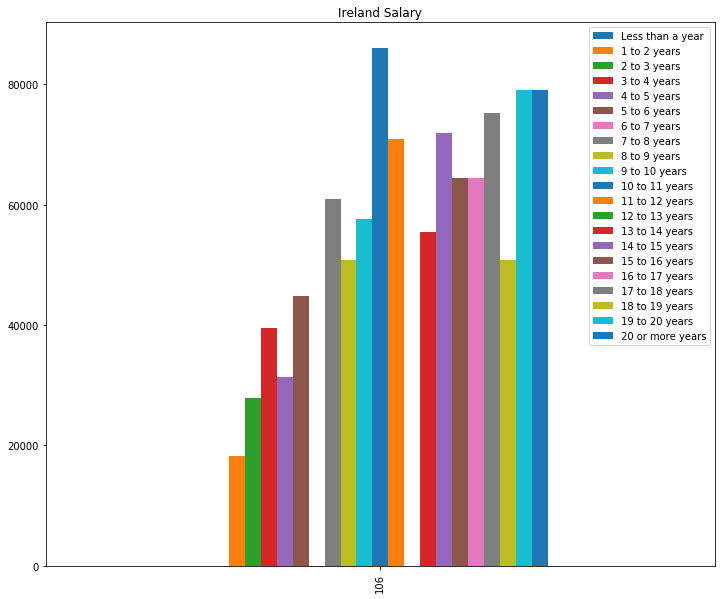

In [18]:
dfYears[(dfYears['Country'] == 'Ireland')].plot(kind='bar',title ="Ireland Salary",figsize=(12,10))

The data somewhat fits to what is expected. In general, salary increases with years programming.

<h4>Germany</h4>

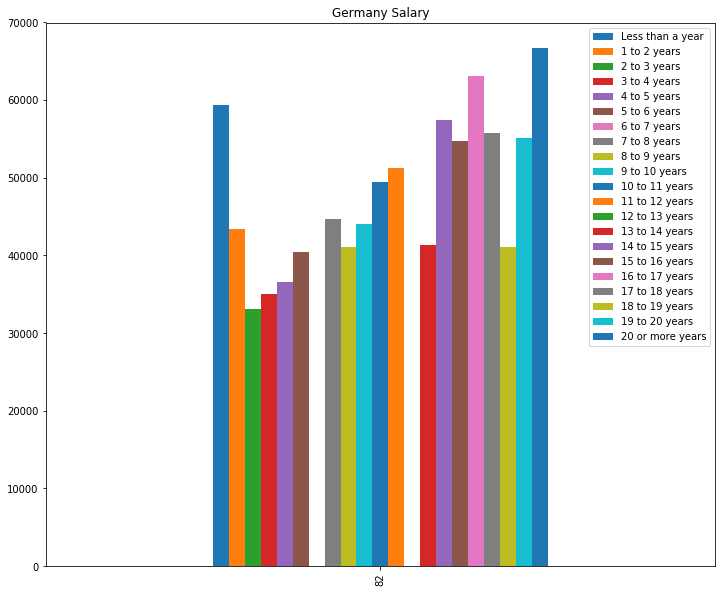

In [19]:
dfYears[(dfYears['Country'] == 'Germany')].plot(kind='bar',title ="Germany Salary",figsize=(12,10))

The data somewhat fits, with a big suprise with less than year having the highest level of salary.

Possible reasons...
Less graduates, need to pay more.
http://www.computerweekly.com/news/4500269840/Fears-of-software-skills-shortage-in-Germany-and-the-Netherlands


<h4>UK</h4>

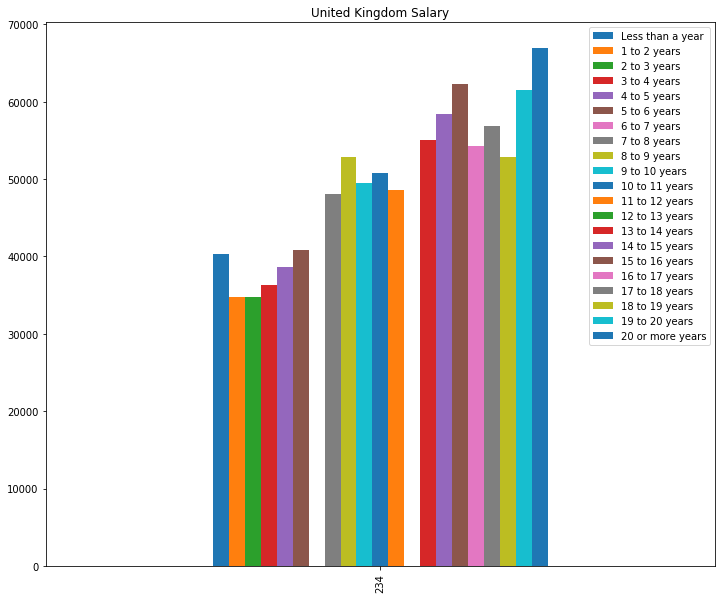

In [20]:
dfYears[(dfYears['Country'] == 'United Kingdom')].plot(kind='bar',title ="United Kingdom Salary",figsize=(12,10))

Generaly fits the expected outcome.

<h4>America</h4>

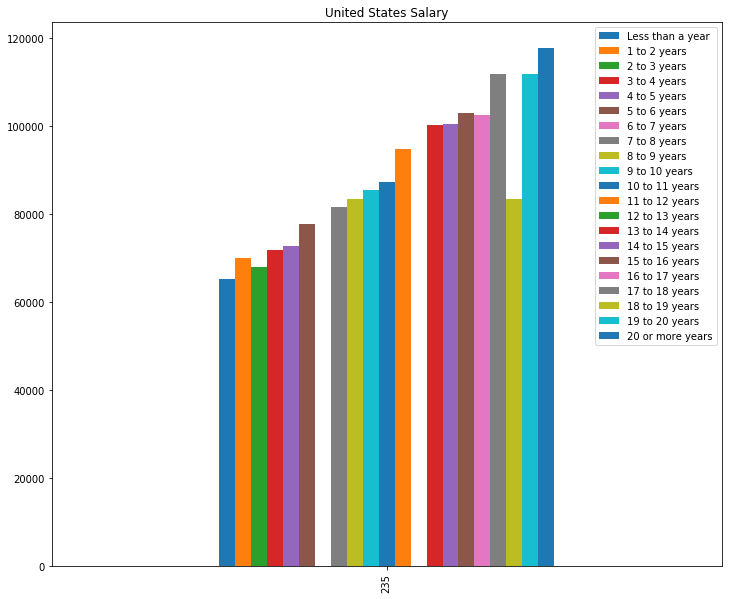

In [21]:
dfYears[(dfYears['Country'] == 'United States')].plot(kind='bar',title ="United States Salary",figsize=(12,10))

It almost perfectly fits the expected outcome.

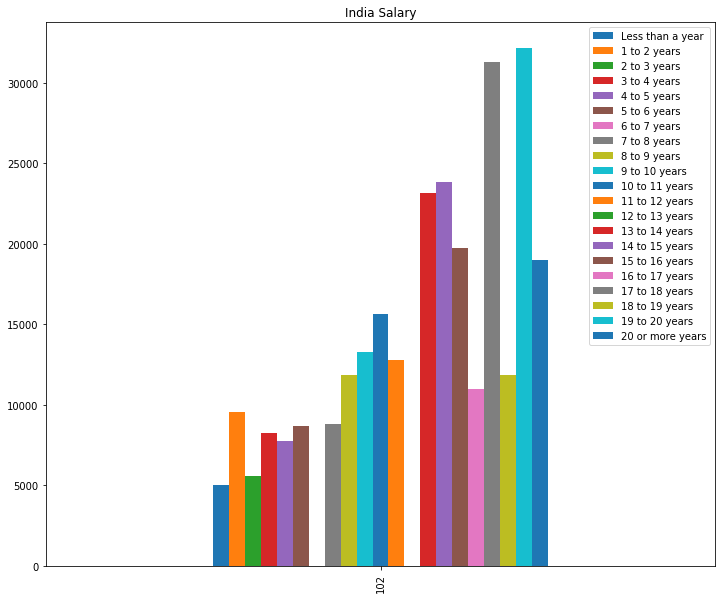

In [22]:
dfYears[(dfYears['Country'] == 'India')].plot(kind='bar',title ="India Salary",figsize=(12,10))

<h2>Linear Regression</h2>

<h3>Education & Salary</h3>

In [23]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt

import matplotlib
 
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
import pandas as pd

from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

%matplotlib inline 
dataSurvey = pd.read_csv('C:/Users/Thomas/Desktop/StackOverFlow/survey_results_public.csv' , encoding='utf8')

In [24]:
dataSurvey = dataSurvey[dataSurvey['Salary'].notnull()]
dataSurvey = dataSurvey.query('Salary>21')

dataSurvey['Salary'].count()
filtered_df = dataSurvey[dataSurvey['Salary'].notnull()]
df = filtered_df[filtered_df['FormalEducation'] != 'I prefer not to answer']
df = df[df['Country'] == 'United States']

df1 = df[['FormalEducation','Salary']]

df1 = df1.replace(['I never completed any formal education', 'Primary/elementary school', 'Secondary school', 
            "Some college/university study without earning a bachelor's degree",
            "Bachelor's degree", 'Professional degree', "Master's degree", 'Doctoral degree'], 
                     [0, 1, 2, 3, 4, 5, 6, 7]) 

In [25]:

X = df1['FormalEducation']
Y = df1['Salary']

X=X.reshape(len(X),1)
Y=Y.reshape(len(Y),1)

X_train = X[-2643:]
X_test = X[2643:]

Y_train = Y[-2643:]
Y_test = Y[2643:]

C:\Users\Thomas\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning:

reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead

C:\Users\Thomas\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning:

reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead



In [26]:
regr = linear_model.LinearRegression()
 
# Train the model using the training sets
regr.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

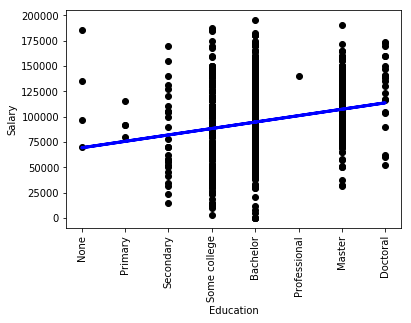

In [27]:
Y_pred = regr.predict(X_test)
# Plot outputs
plt.scatter(X_test, Y_test,  color='black')
plt.plot(X_test, Y_pred, color='blue', linewidth=3)
x = np.array([0,1, 2,3, 4, 5, 6, 7]) 
my_xticks = ['None','Primary','Secondary','Some college', 'Bachelor', 'Professional', 'Master', 'Doctoral']
plt.xticks(x, my_xticks)
plt.xticks(rotation=90)
plt.xlabel('Education')
plt.ylabel('Salary')
plt.show()

In [28]:
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(Y_test, Y_pred))
      # Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(Y_test, Y_pred))

error = np.mean(Y_pred != Y_test)
print(error)

Coefficients: 
 [[ 6332.38449267]]
Mean squared error: 1136853973.06
Variance score: 0.04
1.0


As you can see, there is clearly a correlation between education, and salary.

<h3>Years Programming and Salary</h3>

In [29]:
dataSurvey = dataSurvey[dataSurvey['Salary'].notnull()]
dataSurvey = dataSurvey.query('Salary>21')

dataSurvey['Salary'].count()
filtered_df = dataSurvey[dataSurvey['Salary'].notnull()]
#df = filtered_df[filtered_df['YearsProgram'] != 'I prefer not to answer']
df = dataSurvey[dataSurvey['YearsProgram'].notnull()]
df = df[df['Country'] == 'United States']

df1 = df[['YearsProgram','Salary']]

df1 = df1.replace(['Less than a year', '1 to 2 years','2 to 3 years', '3 to 4 years',  "4 to 5 years", "5 to 6 years", '6 to 7 years', '7 to 8 years', 
 "8 to 9 years", '9 to 10 years', '10 to 11 years', '11 to 12 years', '12 to 13 years', "13 to 14 years", "14 to 15 years", 
 '15 to 16 years', "16 to 17 years", '17 to 18 years', '18 to 19 years', '19 to 20 years', '20 or more years'], 
                     [0, 1, 2, 3, 4, 5, 6, 7,8,9,10,11,12, 13, 14, 15, 16,17,18 , 19, 20])


In [30]:

X = df1['YearsProgram']
Y = df1['Salary']

X=X.reshape(len(X),1)
Y=Y.reshape(len(Y),1)

X_train = X[-2643:]
X_test = X[2643:]

Y_train = Y[-2643:]
Y_test = Y[2643:]

C:\Users\Thomas\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning:

reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead

C:\Users\Thomas\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning:

reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead



In [31]:
regr = linear_model.LinearRegression()
 
# Train the model using the training sets
regr.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

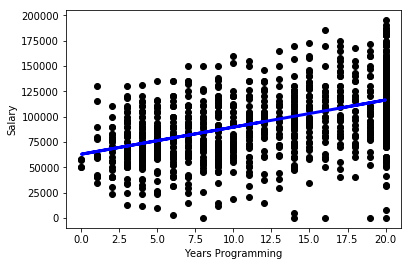

In [32]:
Y_pred = regr.predict(X_test)
# Plot outputs
plt.scatter(X_test, Y_test,  color='black')
plt.plot(X_test, Y_pred, color='blue', linewidth=3)
plt.xlabel('Years Programming')
plt.ylabel('Salary')
plt.show()

In [33]:
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(Y_test, Y_pred))
      # Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(Y_test, Y_pred))

error = np.mean(Y_pred != Y_test)
print(error)

Coefficients: 
 [[ 2671.91022941]]
Mean squared error: 890969618.65
Variance score: 0.25
1.0


There is definitly a correlation wth years programming and salary in the USA

<h2>Expected Salary</h2>


Now that we have looked at actual salary, lets now take a look at the expected salary of a software developer in the IT industry.

In [34]:
dataSurvey = pd.read_csv('C:/Users/Thomas/Desktop/StackOverFlow/survey_results_public.csv')

<h3>Prepare The Data</h3>

Firstly take in every country in the world, then get the expected average salary, based on education, as what was done before for actual salary.

In [35]:
dataSurvey['ExpectedSalary'].count()

2566

Due to there being so few respondants who have answered for expected salary, the number of insights will be incredibly limited regretfully.

In [36]:
for country in mapping:
    mappingData = {'Country': country, 
                  'Expected Average Salary No Education' : dataSurvey.loc[(dataSurvey['Country'] == country) 
                                                 & (dataSurvey['FormalEducation'] == "I never completed any formal education"), 'ExpectedSalary'].mean(),
                   'Expected Average Salary Primary' : dataSurvey.loc[(dataSurvey['Country'] == country) 
                                                 & (dataSurvey['FormalEducation'] == "Primary/elementary school"), 'ExpectedSalary'].mean(),
                   'Expected Average Salary Secondary' : dataSurvey.loc[(dataSurvey['Country'] == country) 
                                                 & (dataSurvey['FormalEducation'] == "Secondary school"), 'ExpectedSalary'].mean(),
                   'Expected Average Salary Some college' : dataSurvey.loc[(dataSurvey['Country'] == country)
                                                 & (dataSurvey['FormalEducation'] == "Some college/university study without earning a bachelor's degree"), 'ExpectedSalary'].mean(),
                   'Expected Average Salary Bachelor' : dataSurvey.loc[(dataSurvey['Country'] == country) 
                                                 & (dataSurvey['FormalEducation'] == "Bachelor's degree"), 'ExpectedSalary'].mean(),
                   'Expected Average Salary Professional' : dataSurvey.loc[(dataSurvey['Country'] == country) 
                                                 & (dataSurvey['FormalEducation'] == "Professional degree"), 'ExpectedSalary'].mean(),
                   'Expected Average Salary Master' : dataSurvey.loc[(dataSurvey['Country'] == country) 
                                                 & (dataSurvey['FormalEducation'] == "Master's degree"), 'ExpectedSalary'].mean(),
                   'Expected Average Salary Doctoral' : dataSurvey.loc[(dataSurvey['Country'] == country) 
                                                 & (dataSurvey['FormalEducation'] == "Doctoral degree"), 'ExpectedSalary'].mean(),
                  'Expected Salary' : dataSurvey.loc[dataSurvey['Country'] == country, 'ExpectedSalary'].mean(),
                  }
    mappingDataList.append(mappingData)


dfExpectedSalary = pd.DataFrame(mappingDataList, columns=['Country','Expected Average Salary No Education', 
                                                      'Expected Average Salary Primary', 'Expected Average Salary Secondary',
                                                      'Expected Average Salary Some college',
                                                     'Expected Average Salary Bachelor', 'Expected Average Salary Professional', 
                                                     'Expected Average Salary Master', 'Expected Average Salary Doctoral' ])

<h3>Expected Salary Based on Education</h3>

Now lets take a look at some countries and their expected salary, based on education.

In [37]:
dfExpectedSalary.count()

Country                                 498
Expected Average Salary No Education      9
Expected Average Salary Primary          36
Expected Average Salary Secondary        63
Expected Average Salary Some college     67
Expected Average Salary Bachelor         71
Expected Average Salary Professional      8
Expected Average Salary Master           43
Expected Average Salary Doctoral          4
dtype: int64

<h2>Salary Based on Years Programming</h2>

<h4>Data Preperation</h4>

Will use the same methods to prepare the data as was done previosly.

In [38]:
mappingDataListYears = []

for country in mapping:
    mappingData = {'Country': country, 
                  'Less than a year' : dataSurvey.loc[(dataSurvey['Country'] == country) 
                                                 & (dataSurvey['YearsProgram'] == "Less than a year"), 'ExpectedSalary'].mean(),
                   '1 to 2 years' : dataSurvey.loc[(dataSurvey['Country'] == country) 
                                                 & (dataSurvey['YearsProgram'] == "1 to 2 years"), 'ExpectedSalary'].mean(),
                   '2 to 3 years' : dataSurvey.loc[(dataSurvey['Country'] == country) 
                                                 & (dataSurvey['YearsProgram'] == "2 to 3 years"), 'ExpectedSalary'].mean(),
                   '3 to 4 years' : dataSurvey.loc[(dataSurvey['Country'] == country) 
                                                 & (dataSurvey['YearsProgram'] == "3 to 4 years"), 'ExpectedSalary'].mean(),
                   '4 to 5 years' : dataSurvey.loc[(dataSurvey['Country'] == country)
                                                 & (dataSurvey['YearsProgram'] == "4 to 5 years"), 'ExpectedSalary'].mean(),
                   '5 to 6 years' : dataSurvey.loc[(dataSurvey['Country'] == country) 
                                                 & (dataSurvey['YearsProgram'] == "5 to 6 years"), 'ExpectedSalary'].mean(),
                   '7 to 8 years' : dataSurvey.loc[(dataSurvey['Country'] == country) 
                                                 & (dataSurvey['YearsProgram'] == "7 to 8 years"), 'ExpectedSalary'].mean(),
                   '8 to 9 years' : dataSurvey.loc[(dataSurvey['Country'] == country) 
                                                 & (dataSurvey['YearsProgram'] == "8 to 9 years"), 'ExpectedSalary'].mean(),
                   '9 to 10 years' : dataSurvey.loc[(dataSurvey['Country'] == country) 
                                                 & (dataSurvey['YearsProgram'] == "9 to 10 years"), 'ExpectedSalary'].mean(),
                   '10 to 11 years' : dataSurvey.loc[(dataSurvey['Country'] == country) 
                                                 & (dataSurvey['YearsProgram'] == "10 to 11 years"), 'ExpectedSalary'].mean(),
                   '11 to 12 years' : dataSurvey.loc[(dataSurvey['Country'] == country) 
                                                 & (dataSurvey['YearsProgram'] == "11 to 12 years"), 'ExpectedSalary'].mean(),
                   '13 to 14 years' : dataSurvey.loc[(dataSurvey['Country'] == country) 
                                                 & (dataSurvey['YearsProgram'] == "13 to 14 years"), 'ExpectedSalary'].mean(),
                   '14 to 15 years' : dataSurvey.loc[(dataSurvey['Country'] == country) 
                                                 & (dataSurvey['YearsProgram'] == "14 to 15 years"), 'ExpectedSalary'].mean(),
                   '15 to 16 years' : dataSurvey.loc[(dataSurvey['Country'] == country)
                                                 & (dataSurvey['YearsProgram'] == "15 to 16 years"), 'ExpectedSalary'].mean(),
                   '16 to 17 years' : dataSurvey.loc[(dataSurvey['Country'] == country) 
                                                 & (dataSurvey['YearsProgram'] == "16 to 17 years"), 'ExpectedSalary'].mean(),
                   '17 to 18 years' : dataSurvey.loc[(dataSurvey['Country'] == country) 
                                                 & (dataSurvey['YearsProgram'] == "17 to 18 years"), 'ExpectedSalary'].mean(),
                   '18 to 19 years' : dataSurvey.loc[(dataSurvey['Country'] == country) 
                                                 & (dataSurvey['YearsProgram'] == "8 to 9 years"), 'ExpectedSalary'].mean(),
                   '19 to 20 years' : dataSurvey.loc[(dataSurvey['Country'] == country) 
                                                 & (dataSurvey['YearsProgram'] == "19 to 20 years"), 'ExpectedSalary'].mean(),
                   '20 or more years' : dataSurvey.loc[(dataSurvey['Country'] == country) 
                                                 & (dataSurvey['YearsProgram'] == "20 or more years"), 'ExpectedSalary'].mean()
                  }
    mappingDataListYears.append(mappingData)


dfYears = pd.DataFrame(mappingDataListYears, columns=['Country','Less than a year', '1 to 2 years','2 to 3 years', '3 to 4 years',  "4 to 5 years", "5 to 6 years", '6 to 7 years', '7 to 8 years', 
 "8 to 9 years", '9 to 10 years', '10 to 11 years', '11 to 12 years', '12 to 13 years', "13 to 14 years", "14 to 15 years", 
 '15 to 16 years', "16 to 17 years", '17 to 18 years', '18 to 19 years', '19 to 20 years', '20 or more years'])


In [39]:
dfYears.count()

Country             249
Less than a year     48
1 to 2 years         64
2 to 3 years         60
3 to 4 years         55
4 to 5 years         50
5 to 6 years         47
6 to 7 years          0
7 to 8 years         35
8 to 9 years         26
9 to 10 years        24
10 to 11 years       21
11 to 12 years       12
12 to 13 years        0
13 to 14 years        6
14 to 15 years        7
15 to 16 years        9
16 to 17 years        5
17 to 18 years        5
18 to 19 years       26
19 to 20 years        4
20 or more years     11
dtype: int64

Again, the number of respondants is even less, making it impossible to get any indepth information.